In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,Flatten,MaxPool2D,Reshape,GlobalAveragePooling2D,InputLayer
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [23]:
IMAGE_SIZE = [229,229]
path = r"C:\Users\HP\Downloads\dataset"

In [24]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             validation_split = 0.30)
test_data_gen = ImageDataGenerator(rescale = 1./255,validation_split = 0.30)

In [25]:
training_set = train_data_gen.flow_from_directory(path,
                                                 target_size=(229,229),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'training')

testing_set = test_data_gen.flow_from_directory(path,
                                                 target_size=(229,229),
                                                 batch_size=100,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 subset = 'validation')

Found 1197 images belonging to 2 classes.
Found 512 images belonging to 2 classes.


In [26]:
training_set.class_indices

{'diseased': 0, 'healthy': 1}

In [27]:
from glob import glob
folders = glob(r".\dataset\*")
len(folders)

2

In [28]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [29]:
for layer in inception.layers:
    layer.trainable = False
    
for layer in inception.layers[250:]:
    layer.trainable = True

In [30]:
model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(units = 2, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 10,643,842
Non-trainable params: 11,261,344
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5,verbose=1,mode='auto')

lr = ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=0.2,patience=5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

In [34]:
result = model.fit(training_set, validation_data=testing_set, epochs=20,
    steps_per_epoch=len(training_set),validation_steps=len(testing_set),callbacks=callback)

Epoch 1/20
12/12 [==============================] - 97s 8s/step - loss: 0.0030 - accuracy: 0.9983 - val_loss: 0.0889 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 2/20
12/12 [==============================] - 97s 8s/step - loss: 9.4353e-04 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 3/20
12/12 [==============================] - 97s 8s/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0723 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 4/20
12/12 [==============================] - 98s 8s/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.5359 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 5/20
12/12 [==============================] - 97s 8s/step - loss: 0.0307 - accuracy: 0.9950 - val_loss: 0.0999 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/20
12/12 [==============================] - 97s 8s/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0390 - val_accuracy: 0.9922 - lr: 0.0010
Epoch 7/20
12/12 [==============================] - 96s 8s/step - loss: 0.0016

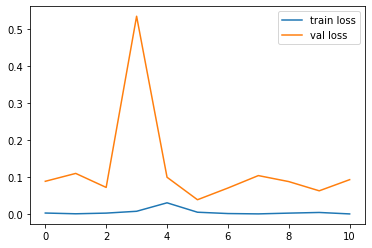

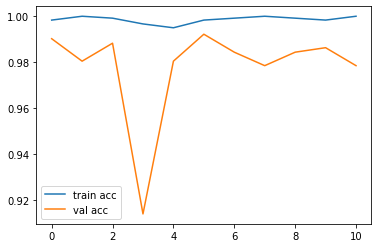

In [35]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [40]:
model.save("final_model.h5")

In [41]:
print("The accuracy of the model:{:.2f} %".format(result.history['accuracy'][-1]*100))
print("The accuracy of the testing:{:.2f} %".format(result.history['val_accuracy'][-1]*100))

The accuracy of the model:100.00 %
The accuracy of the testing:97.85 %
